In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
import os

The given section below is the code to implement Linear Regression.

In [29]:
drive.mount('/content/drive')
linear_train = pd.read_csv('/content/drive/MyDrive/WoC Datasets/Linear Regression/linear_regression_train.csv')
x = linear_train[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25']].values
y = linear_train['Target'].values
linear_test = pd.read_csv('/content/drive/MyDrive/WoC Datasets/Linear Regression/linear_regression_test.csv')
x_test = linear_test[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25']].values

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
alpha = 0.00001
iterations = 48000

In [18]:
def initialisation(x):
  x = np.hstack((np.ones((x.shape[0], 1)), x))
  w = np.zeros(x.shape[1])
  return x, w

In [19]:
def hypothesis_function(x,w):
  y_pred = np.dot(x, w)
  return y_pred

In [20]:
def cost_function(x,w,y):
  m = x.shape[0]
  y_pred = hypothesis_function(x,w)
  cost = np.sum(np.square(y_pred-y))/(2*m)
  return cost

In [21]:
def gradient_descent(x,y,alpha,iterations):
  m = x.shape[0]
  x, w = initialisation(x)
  cost_list = []
  for i in range (iterations):
    y_pred = hypothesis_function(x,w)
    error = y_pred-y
    dj_dw = np.dot(x.T, error)/m
    w = w - alpha*dj_dw
    cost = cost_function(x,w,y)
    cost_list.append(cost)
  return w, cost_list

In [30]:
w, cost_list = gradient_descent(x,y,alpha,iterations)

In [31]:
x_test, _ = initialisation(x_test)
y_test_pred = hypothesis_function(x_test,w)
df = pd.DataFrame({'Target': y_test_pred})
df.to_csv('linear_regression_test_predictions.csv', index=False)
print(os.getcwd())
files.download('/content/linear_regression_test_predictions.csv')

/content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

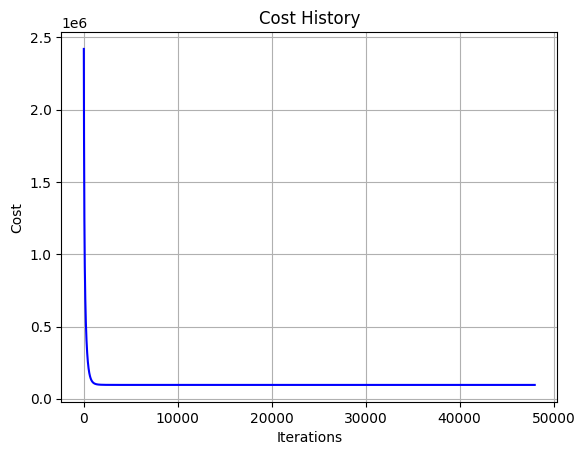

In [28]:
plt.plot(range(iterations), cost_list, color='blue')
plt.title('Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

The code below is to implement polynomial regression.

In [2]:
drive.mount('/content/drive')
poly_train = pd.read_csv('/content/drive/MyDrive/WoC Datasets/Polynomial Regression/polynomial_regression_train.csv')
x = poly_train[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']].values
y = poly_train['Target'].values
poly_test = pd.read_csv('/content/drive/MyDrive/WoC Datasets/Polynomial Regression/polynomial_regression_test.csv')
x_test = poly_test[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']].values

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
alpha = 0.0001
iterations = 48000
degree = 5

In [4]:
def polynomial_features(x, degree):
    n_features = x.shape[1]
    features = [np.ones((x.shape[0], 1))]
    for i in range(1, degree + 1):
        features.append(x ** i)
    return np.hstack(features)

In [5]:
def poly_pred(x, w, degree):
    x_poly = polynomial_features(x, degree)
    return np.dot(x_poly, w)

In [6]:
def grad_descent_poly(x, y, degree, alpha, iterations):
  x_poly = polynomial_features(x, degree)
  m = x_poly.shape[0]
  w = np.zeros(x_poly.shape[1])
  cost_list=[]
  for i in range (iterations):
    y_pred = poly_pred(x, w, degree)
    error = y_pred - y
    dj_dw = np.dot(x_poly.T, error)/m
    w = w - alpha*dj_dw
    cost = (1/(2*m))*np.sum(error**2)
    cost_list.append(cost)
  return w, cost_list

In [7]:
w, cost_list = grad_descent_poly(x, y, degree, alpha, iterations)

In [8]:
def r2_score(y, y_pred):
  y_mean = np.mean(y)
  ss_total = np.sum((y - y_mean)**2)
  ss_residual = np.sum((y - y_pred)**2)
  r2 = 1 - (ss_residual / ss_total)
  return r2

In [10]:
r2 = r2_score(y, poly_pred(x, w, degree))
print("R2 Score:", r2)

R2 Score: 0.27839887028704524


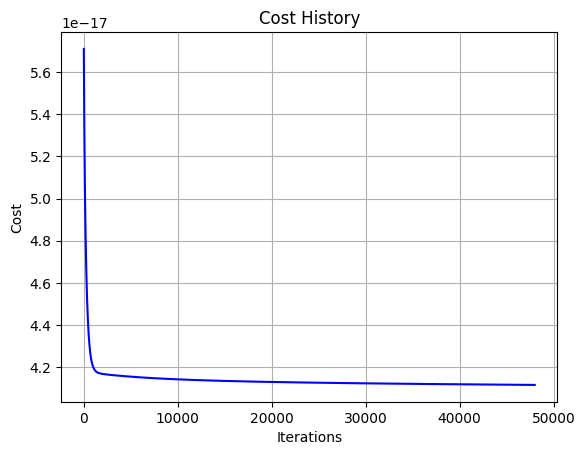

In [9]:
plt.plot(range(iterations), cost_list, color='blue')
plt.title('Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [15]:
y_test_pred = poly_pred(x_test, w, degree)
df = pd.DataFrame({'Target': y_test_pred})
df.to_csv('polynomial_regression_test_predictions.csv', index=False)
print(os.getcwd())
files.download('/content/polynomial_regression_test_predictions.csv')

/content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The section below is to implement logistic regression and classification

In [32]:
drive.mount('/content/drive')
log_train = pd.read_csv('/content/drive/MyDrive/WoC Datasets/Logistic Regression/binary_classification_train.csv')
x = log_train[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20']].values
y = log_train['Class'].values
log_test = pd.read_csv('/content/drive/MyDrive/WoC Datasets/Logistic Regression/binary_classification_test.csv')
x_test = log_test[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20']].values

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
alpha = 0.00001
iterations = 48000

In [34]:
def sigmoid(z):
  y = 1 / (1 + np.exp(-z))
  return y

In [35]:
def log_reg(x, w):
  z = np.dot(x, w)
  return z

In [36]:
def log_cost_function(x, w, y):
  z = log_reg(x, w)
  y_pred = sigmoid(z)
  m = x.shape[0]
  cost = -(1/m) * np.sum(y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred))
  return cost

In [37]:
def log_grad_desc(x, y, alpha, iterations):
  cost_list = []
  m = x.shape[0]
  x = np.hstack((np.ones((m, 1), dtype=float), x))
  w = np.zeros(x.shape[1])
  for i in range (iterations):
    z = log_reg(x, w)
    y_pred = sigmoid(z)
    error = y_pred - y
    dj_dw = np.dot(x.T, error)/m
    w = w - alpha*dj_dw
    cost = log_cost_function(x, w, y)
    cost_list.append(cost)
  return w, cost_list

In [38]:
def log_reg_pred(x, w):
  m = x.shape[0]
  x = np.hstack((np.ones((m, 1), dtype=float), x))
  z = log_reg(x, w)
  y = sigmoid(z)
  return y

In [39]:
w, cost_list = log_grad_desc(x, y, alpha, iterations)

In [41]:
y_test_pred = log_reg_pred(x_test, w)
df = pd.DataFrame({'Class': y_test_pred})
df.to_csv('binary_classification_test_predictions.csv', index=False)
print(os.getcwd())
files.download('/content/binary_classification_test_predictions.csv')

/content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

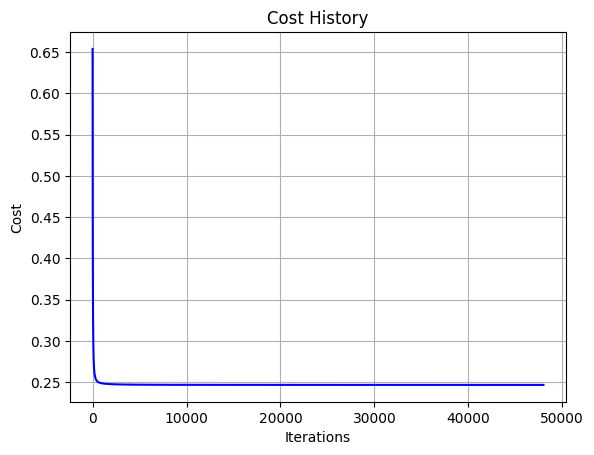

In [40]:
plt.plot(range(iterations), cost_list, color='blue')
plt.title('Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

The code section below is to implement K-Means Clustering and K-Nearest Neighbours algorithm on a dataset of unsupervised learning.

In [ ]:
drive.mount('/content/drive')
unsupervised = pd.read_csv('/content/drive/MyDrive/WoC Datasets/Unsupervised Learning/unsupervised_data.csv')
x = unsupervised[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6']].values

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
iterations = 500
k = 4

In [ ]:
def kmc(x, k, iterations):
  m = x.shape[0]
  centroids = x[np.random.choice(m, k, replace=False)]
  for i in range(iterations):
    distances = np.linalg.norm(x[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    clusters = [x[labels == j] for j in range(k)]
    new_centroids = np.array([np.mean(cluster, axis=0) if len(cluster) > 0 else centroids[j] for j, cluster in enumerate(clusters)])
    cost = np.sum([np.sum((x[labels == j] - centroids[j]) ** 2) for j in range(k)])
    if np.all(centroids == new_centroids):
      break
    centroids = new_centroids
  return clusters, centroids, cost

In [ ]:
def wcss(x, k_max):
  cost_list = []
  for k in range(1, k_max + 1):
    clusters, centroids, cost = kmc(x, k, 500)
    cost_list.append(cost)
  plt.plot(range(1, k_max + 1), cost_list, color='blue')
  plt.title('Cost History')
  plt.xlabel('Cluster Count')
  plt.ylabel('Cost')
  plt.grid(True)
  plt.show()
  return cost_list

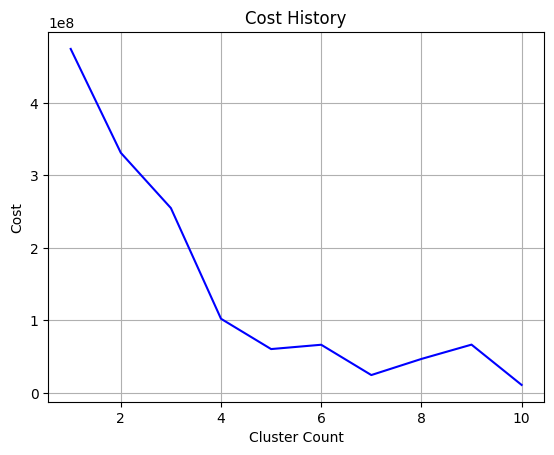

In [ ]:
cost_list = wcss(x, 10)

In [ ]:
def knn(x, k):
  m = x.shape[0]
  distances = []
  for i in range (m):
    distance = np.linalg.norm(x[i] - x, axis=1)
    distance = distance.astype(np.float64)
    distance = list(distance)
    distance[i] = np.inf
    distances.append(distance)
  return np.argsort(distances, axits=1)[:, :k]

In [ ]:
point_indices = knn(x,k)
print(point_indices)

The code below is to implement softmax function for multiclass classification from scratch.

In [53]:
drive.mount('/content/drive')
log_train = pd.read_csv('/content/drive/MyDrive/WoC Datasets/Logistic Regression/multi_classification_train.csv')
x = log_train[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20']].values
y = log_train['Class'].values
log_test = pd.read_csv('/content/drive/MyDrive/WoC Datasets/Logistic Regression/multi_classification_test.csv')
x_test = log_test[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20']].values

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
alpha = 0.0000001
iterations = 48000

In [44]:
def softmax(z):
  exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
  return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [45]:
def log_reg(x, w):
  z = np.dot(x, w)
  return z

In [46]:
def one_hot_encoding(y):
  num_classes = len(np.unique(y))
  return np.eye(num_classes)[y]

In [47]:
def log_pred(x, w):
  z = log_reg(x, w)
  y_pred = softmax(z)
  return y_pred

In [48]:
def cross_entropy_loss(x, y, w):
  y_pred = log_pred(x, w)
  m = x.shape[0]
  y_ohe = one_hot_encoding(y)
  loss = -np.sum(y_ohe * np.log(y_pred)) / m
  return loss

In [49]:
def grad_desc(x, y, alpha, iterations):
  m = x.shape[0]
  x = np.hstack((np.ones((m, 1), dtype=float), x))
  w = np.zeros((x.shape[1], 1))
  y_ohe = one_hot_encoding(y)
  cost_list = []
  for i in range (iterations):
    y_pred = log_pred(x, w)
    error = y_pred - y_ohe
    dj_dw = np.dot(x.T, error)/m
    w = w - alpha*dj_dw
    cost = cross_entropy_loss(x, y, w)
    cost_list.append(cost)
  return w, cost_list

In [50]:
w, cost_list = grad_desc(x, y, alpha, iterations)

In [56]:
y_test_pred = log_pred(np.hstack((np.ones((x_test.shape[0], 1), dtype=float), x_test)), w)
predicted_classes = np.argmax(y_test_pred, axis=1)
df = pd.DataFrame({'Class': predicted_classes})
df.to_csv('multi_classification_test_predictions.csv', index=False)
print(os.getcwd())
files.download('/content/multi_classification_test_predictions.csv')

/content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

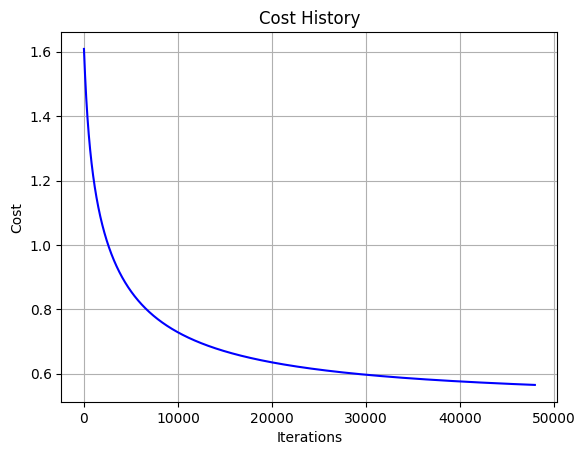

In [51]:
plt.plot(range(iterations), cost_list, color='blue')
plt.title('Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

The code below is to build an n-layer neural network

In [2]:
drive.mount('/content/drive')
nn_train = pd.read_csv('/content/drive/MyDrive/WoC Datasets/Neural Network/nn_train.csv')
x = nn_train[[f"Feature_{i}" for i in range(1, 1025)]].values
y_binary = nn_train[['binary_label']].values
y_multi = nn_train[['class_label']].values
nn_test = pd.read_csv('/content/drive/MyDrive/WoC Datasets/Neural Network/nn_test.csv')
x_test = nn_test[[f"Feature_{i}" for i in range(1, 1025)]].values

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
downsampled_data = nn_train.groupby(nn_train.index // 20).mean()
x = downsampled_data[[f"Feature_{i}" for i in range(1, 1025)]].values
y_binary = downsampled_data[['binary_label']].values
y_multi = downsampled_data[['class_label']].values

In [4]:
iterations = 10000
alpha = 0.0001
n = 5

In [5]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [6]:
def sigmoid_derivative(z):
  return sigmoid(z) * (1 - sigmoid(z))

In [7]:
def relu(z):
  return np.maximum(0, z)

In [8]:
def relu_derivative(z):
  return np.where(z > 0, 1, 0)

In [9]:
def softmax(z):
  exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
  return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [10]:
def layer_dimensions(layer_dims):
  structure = {}
  for i in range(1, len(layer_dims)):
    structure[f"w{i}"] = np.random.randn(int(layer_dims[i]), int(layer_dims[i-1])) * 0.0001
    structure[f"b{i}"] = np.zeros((int(layer_dims[i]), 1))
  return structure

In [11]:
def forward_propagation(x, structure, activations):
  caches = []
  A = x.T
  for i in range(1, len(structure)//2 +1):
    w = structure[f"w{i}"]
    b = structure[f"b{i}"]
    z = np.dot(w, A) + b
    A = activations[i-1](z)
    cache = (A, w, b, z)
    caches.append(cache)
  return A, caches

In [12]:
def binary_cost(AL, y):
  m = y.shape[1]
  cost = -(1/m) * np.sum(y*np.log(AL) + (1 - y)*np.log(1 - AL))
  return np.squeeze(cost)

In [25]:
def back_propagation(AL, y, caches, activation_deriv):
  grads = {}
  L = len(caches)
  m = y.shape[1]
  y = y.reshape(AL.shape)
  dAL = - (np.divide(y, AL) - np.divide(1 - y, 1 - AL))
  for i in reversed(range(L)):
    A, w, b, z = caches[i]
    activation_derivative = activation_deriv[i]
    dZ = dAL * activation_derivative(z)
    dZ = dZ.reshape(w.shape[0], -1)
    A = caches[i-1][0] if i > 0 else x.T
    A = A.reshape(w.shape[1], -1)
    grads[f"dw{i+1}"] = np.dot(dZ, A.T) / m
    grads[f"db{i+1}"] = np.sum(dZ, axis=1, keepdims=True) / m
    dAL = np.dot(w.T, dZ)
  return grads

In [27]:
def update_parameters(structure, grads, alpha):
  for i in range(1, len(structure)//2 +1):
    structure[f"w{i}"] -= alpha * grads[f"dw{i}"]
    structure[f"b{i}"] -= alpha * grads[f"db{i}"]
  return structure

In [15]:
def binary_classification_train(x, y, layer_dims_binary, activations, activation_deriv, alpha, iterations):
  structure = layer_dimensions(layer_dims_binary)
  cost_list_binary = []
  for i in range(iterations):
    AL, caches = forward_propagation(x, structure, activations)
    cost = binary_cost(AL, y)
    grads = back_propagation(AL, y, caches, activation_deriv)
    structure = update_parameters(structure, grads, alpha)
    cost_list_binary.append(cost)
  return structure, cost_list_binary

In [16]:
def multi_cost(AL, y):
  m = y.shape[1]
  cost = -(1/m) * np.sum(y*np.log(AL))
  return np.squeeze(cost)

In [17]:
def multi_classification_train(x, y, layer_dims_multi, activations, activation_deriv, alpha, iterations):
  structure = layer_dimensions(layer_dims_multi)
  cost_list_multi = []
  for i in range(iterations):
    AL, caches = forward_propagation(x, structure, activations)
    cost = multi_cost(AL, y)
    grads = back_propagation(AL, y, caches, activation_deriv)
    structure = update_parameters(structure, grads, alpha)
    cost_list_multi.append(cost)
  return structure, cost_list_multi

In [ ]:
layer_dims_binary = []
for i in range(n):
  if i == 0:
    layer_dims_binary.append(x.shape[1])
  else:
    layer_dims_binary.append((x.shape[1])/4)
layer_dims_binary.append(1)
activations = [sigmoid] * n
activation_deriv = [sigmoid_derivative] * n
structure_binary, cost_list_binary = binary_classification_train(x, y_binary, layer_dims_binary, activations, activation_deriv, alpha, iterations)
plt.plot(range(iterations), cost_list_binary, color='blue')
plt.title('Cost History Binary Classification')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [ ]:
layer_dims_multi = []
for i in range(n):
  if i == 0:
    layer_dims_multi.append(x.shape[1])
  else:
    layer_dims_multi.append((x.shape[1])/4)
layer_dims_multi.append(y_multi.shape[1])
activations = [relu, relu, relu, relu, softmax]
activation_deriv = [relu_derivative, relu_derivative, relu_derivative, relu_derivative, softmax]
structure_multi, cost_list_multi = multi_classification_train(x, y_multi, layer_dims_multi, activations, activation_deriv, alpha, iterations)
plt.plot(range(iterations), cost_list_multi, color='blue')
plt.title('Cost History Multi Classification')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [ ]:
y_test_pred_binary = forward_propagation(x_test, structure_binary, activations)[0]
df = pd.DataFrame({'binary_label': y_test_pred_binary})
df.to_csv('nn_test_predictions_binary.csv', index=False)

In [ ]:
y_test_pred_multi = forward_propagation(x_test, structure_multi, activations)[0]
df = pd.DataFrame({'class_label': y_test_pred_multi})
df.to_csv('nn_test_predictions_multi.csv', index=False)